In [ ]:
import pandas as pd

df = pd.read_csv('/content/global_gaming_esports_2010_2025.csv')
print('\nLoading the dataset :',df.head())


Loading the dataset :    Year        Country         Region  Gaming_Revenue_BillionUSD  \
0  2010  United States  North America                       6.24   
1  2011  United States  North America                       7.74   
2  2012  United States  North America                       9.60   
3  2013  United States  North America                      11.91   
4  2014  United States  North America                      14.77   

   Esports_Revenue_MillionUSD  Active_Players_Million  \
0                       409.6                    11.0   
1                       622.7                    32.4   
2                       928.3                    51.9   
3                      1321.8                    50.3   
4                       869.1                    13.4   

   Esports_Viewers_Million  Avg_Spending_USD Top_Genre Top_Platform  ...  \
0                     17.9             133.9  Strategy       Mobile  ...   
1                     76.7              64.9    Sports      Console  ... 

In [ ]:
# data cleaning

print('Shape of the data :\n',df.shape)

print("\nData information :\n",df.info())

print('\nMissing values :\n',df.isnull().sum())

print('Shows any duplicate values :\n',df.duplicated().sum())

print('\nDescriptive  statistics :\n',df.describe())

Shape of the data :
 (400, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          400 non-null    int64  
 1   Country                       400 non-null    object 
 2   Region                        400 non-null    object 
 3   Gaming_Revenue_BillionUSD     400 non-null    float64
 4   Esports_Revenue_MillionUSD    400 non-null    float64
 5   Active_Players_Million        400 non-null    float64
 6   Esports_Viewers_Million       400 non-null    float64
 7   Avg_Spending_USD              400 non-null    float64
 8   Top_Genre                     400 non-null    object 
 9   Top_Platform                  400 non-null    object 
 10  Esports_Tournaments_Count     400 non-null    int64  
 11  Pro_Players_Count             400 non-null    int64  
 12  Internet_Penetration_Percent  400

In [ ]:
# rename column
df_rename = df.rename(columns={'Gaming_Revenue_BillionUSD':'Game_revenue','Esports_Revenue_MillionUSD':'Esports_revenue'})
print('\nAfter renaming column name :\n',df_rename.head())

# filtering
df_avg_spending = df[(df['Avg_Spending_USD'] >=76.9) & (df['Avg_Spending_USD'] < 84.1)]
print('\nValues :\n',df_avg_spending.tail())

df_game_revenue = df[(df['Gaming_Revenue_BillionUSD'] >=4.80) | (df['Gaming_Revenue_BillionUSD'] < 64)]
print('\nGame revenue :\n',df_game_revenue.tail())

df['Avg_Latency_ms'] = df['Avg_Latency_ms'].astype('float32')
print('\nChanging datatype :\n',df.dtypes)

df_sort = df.sort_values(by='Avg_Latency_ms',ascending=False)
print('\nSorting :\n',df_sort)

df_count = df['Country'].value_counts()
print('\nCount :\n',df_count)

df_group = df.groupby('Country')['Avg_Latency_ms'].mean()
print('\nGroup :\n',df_group.head())

df_drop = df.drop(columns=['Avg_Latency_ms'])
print('\nDrop :\n',df_drop.head())

def speed(x):
  if x < 69.1:
    return 'Low'
  else:
    return 'High'
df['Speed'] = df['Avg_Spending_USD'].apply(speed)
print('\nNew column :\n',df.head())

df['Region'] = df['Region'].str.upper()
print(df.head())

print('\n1st index using loc :\n',df.loc[1])
print('\nfrom 1st row to 3rd row :\n',df.loc[1:3])
print('\nselecting specific columns with index from 2 to 6 :\n',df.loc[2:6,['Year','Gaming_Revenue_BillionUSD']])

print('\n2nd index using iloc :\n',df.iloc[2])
print('\nfrom 1st row to 3rd row :\n',df.iloc[1:4])
print('\nselecting specific columns with index from 2 to 6 :\n',df.iloc[2:7,1:3])


After renaming column name :
    Year        Country         Region  Game_revenue  Esports_revenue  \
0  2010  United States  North America          6.24            409.6   
1  2011  United States  North America          7.74            622.7   
2  2012  United States  North America          9.60            928.3   
3  2013  United States  North America         11.91           1321.8   
4  2014  United States  North America         14.77            869.1   

   Active_Players_Million  Esports_Viewers_Million  Avg_Spending_USD  \
0                    11.0                     17.9             133.9   
1                    32.4                     76.7              64.9   
2                    51.9                    148.4              84.1   
3                    50.3                     92.9              76.9   
4                    13.4                     21.3              69.0   

  Top_Genre Top_Platform  ...  Pro_Players_Count  \
0  Strategy       Mobile  ...              15912   

Numerical Exploratory Data Analysis

In [ ]:
import pandas as pd

df = pd.read_csv('/content/global_gaming_esports_2010_2025.csv')
print('original data set :\n',df.head())

#measure of central tendency
mean_of_game_revenue = df.Gaming_Revenue_BillionUSD.mean()
print('\nmean of game revenue :\n',mean_of_game_revenue)

median_of_game_revenue = df.Gaming_Revenue_BillionUSD.median()
print('\nmedian of game revenue :\n',median_of_game_revenue)

mode_of_game_revenue = df.Gaming_Revenue_BillionUSD.mode()
print('\nmode of game revenue :\n',mode_of_game_revenue)

# measure of dispersion
df_variance = df.Gaming_Revenue_BillionUSD.var()
print('\nvariance of game revenue :\n',df_variance)

df_std = df.Gaming_Revenue_BillionUSD.std()
print('\nstandard deviation of game revenue :\n',df_std)

# third moment of bussiness decision - skewness
df_skew = df.Gaming_Revenue_BillionUSD.skew()
print('\nskewness of game revenue :\n',df_skew)

# 4th moment of bussiness decision - kurtosis
df_kurtosis = df.Gaming_Revenue_BillionUSD.kurtosis()
print('\nKurtosis of game revenue :\n',df_kurtosis)

original data set :
    Year        Country         Region  Gaming_Revenue_BillionUSD  \
0  2010  United States  North America                       6.24   
1  2011  United States  North America                       7.74   
2  2012  United States  North America                       9.60   
3  2013  United States  North America                      11.91   
4  2014  United States  North America                      14.77   

   Esports_Revenue_MillionUSD  Active_Players_Million  \
0                       409.6                    11.0   
1                       622.7                    32.4   
2                       928.3                    51.9   
3                      1321.8                    50.3   
4                       869.1                    13.4   

   Esports_Viewers_Million  Avg_Spending_USD Top_Genre Top_Platform  ...  \
0                     17.9             133.9  Strategy       Mobile  ...   
1                     76.7              64.9    Sports      Console  ...   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

Graphical Exploratory Data Analysis

univariate visualization

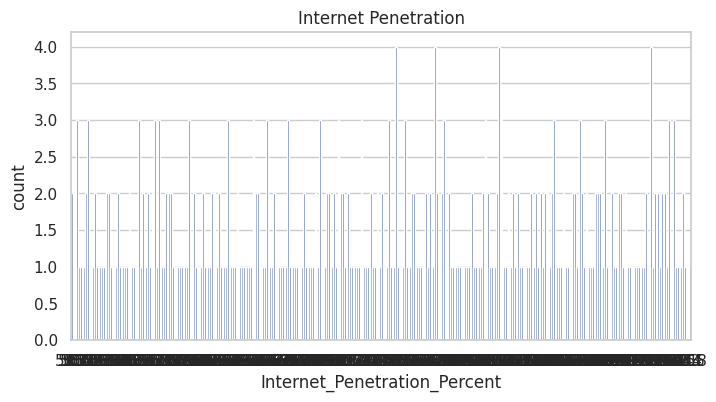

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Internet_Penetration_Percent'])
plt.title('Internet Penetration')
plt.show()

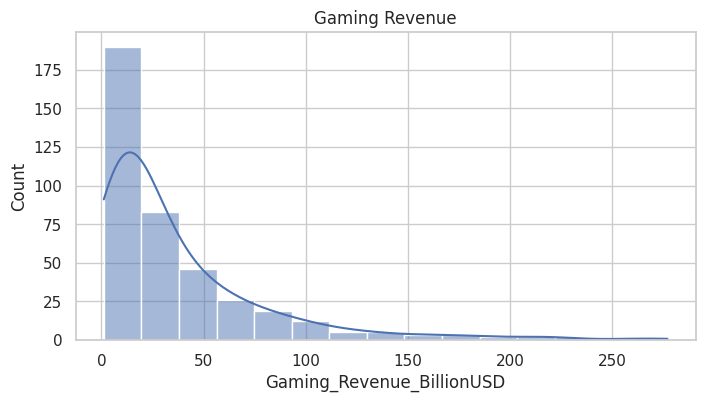

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(x=df['Gaming_Revenue_BillionUSD'],bins=15,kde=True)
plt.title('Gaming Revenue')
plt.show()

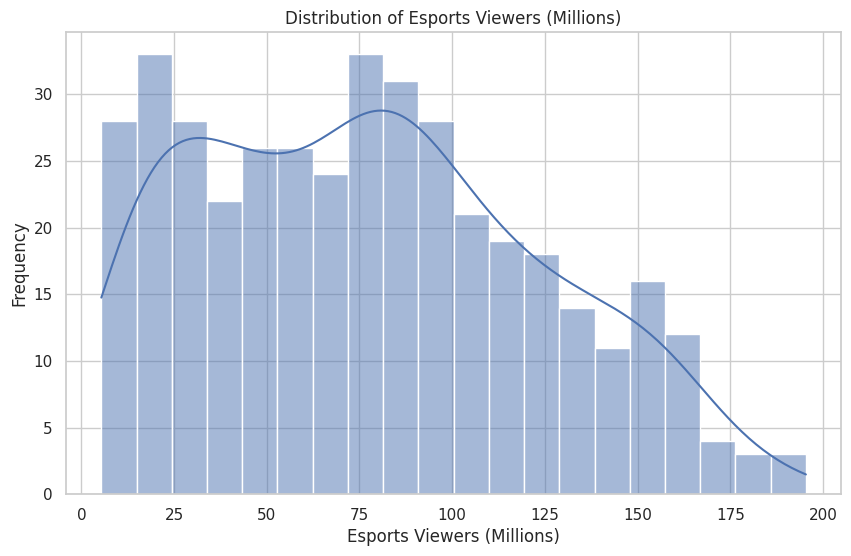

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['Esports_Viewers_Million'], bins=20, kde=True)
plt.title('Distribution of Esports Viewers (Millions)')
plt.xlabel('Esports Viewers (Millions)')
plt.ylabel('Frequency')
plt.show()

Bivariate Analysis

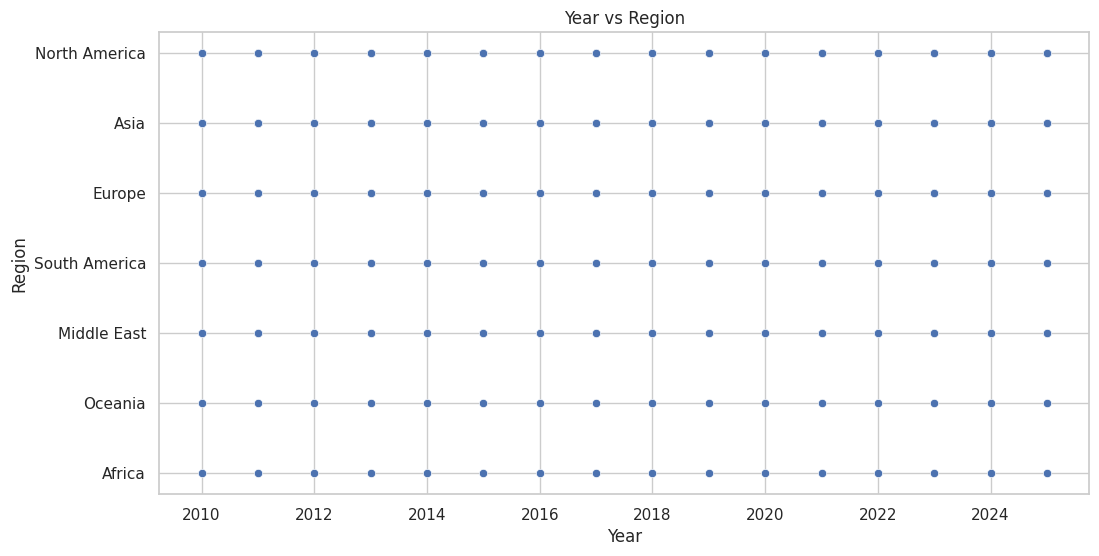

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Year'],y=df['Region'],data=df)
plt.title('Year vs Region')
plt.show()

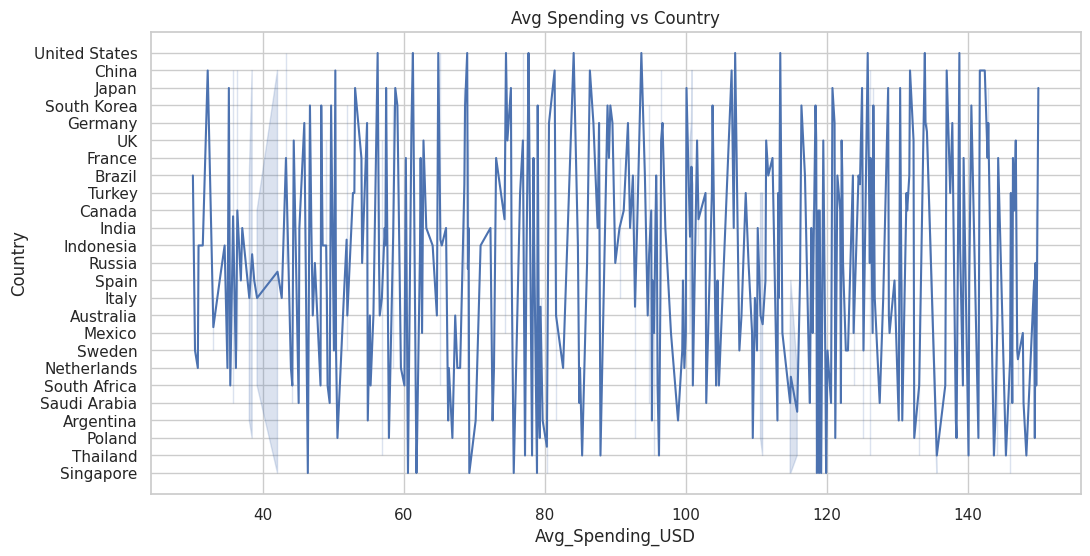

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Avg_Spending_USD'],y=df['Country'],data=df)
plt.title('Avg Spending vs Country')
plt.show()

Categorical Variable Relationships

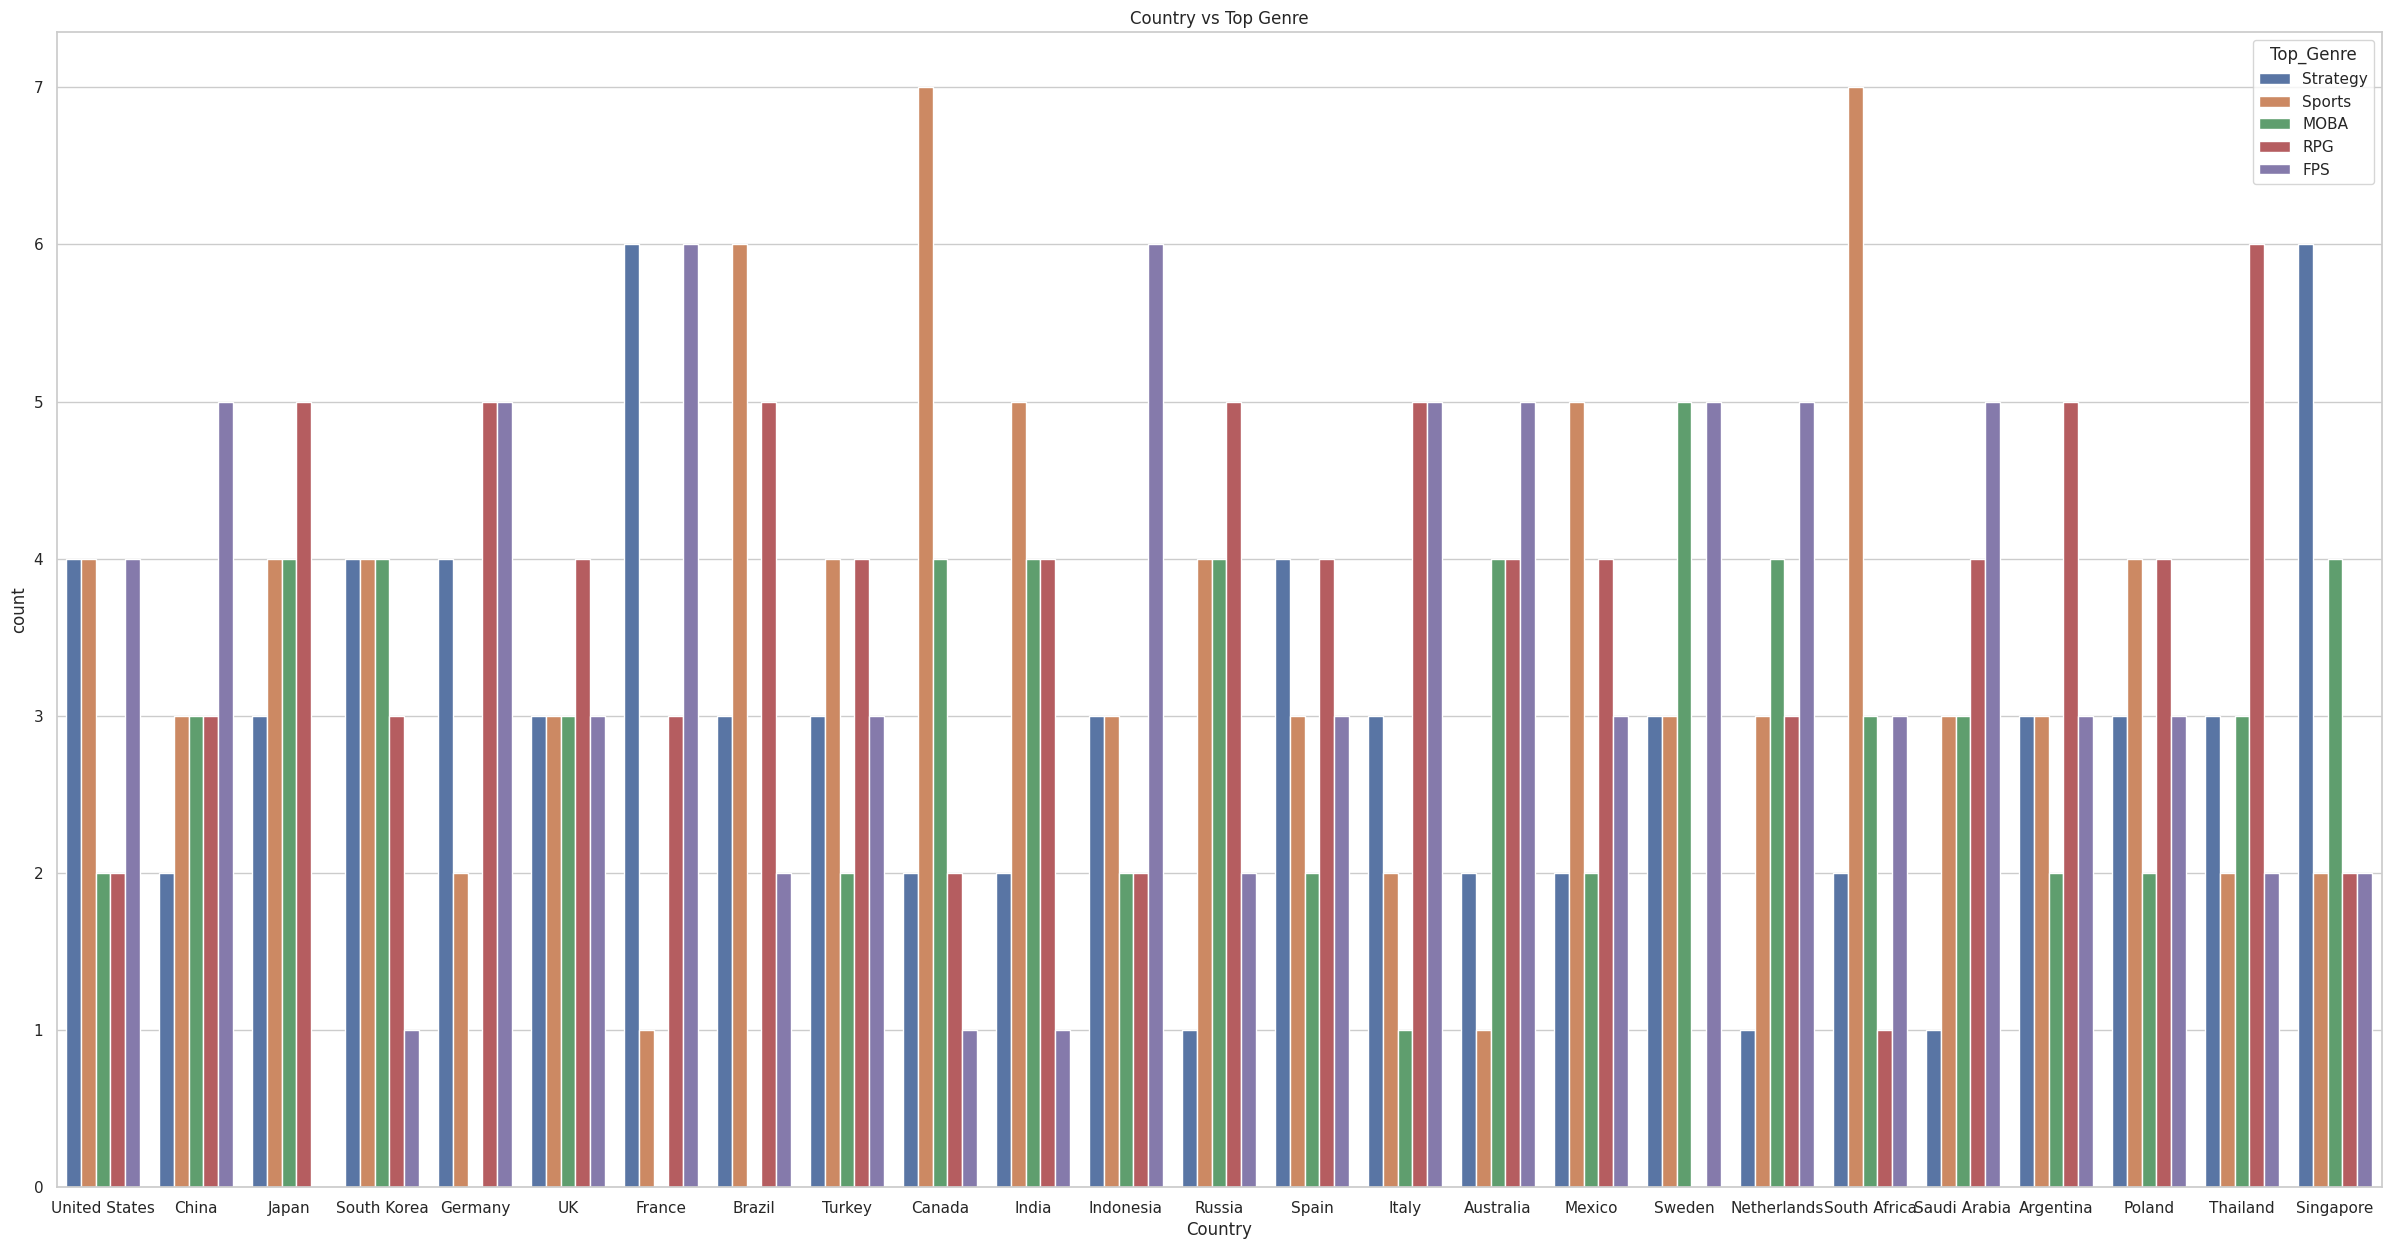

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(x=df['Country'],hue=df['Top_Genre'])
plt.title('Country vs Top Genre')
plt.show()

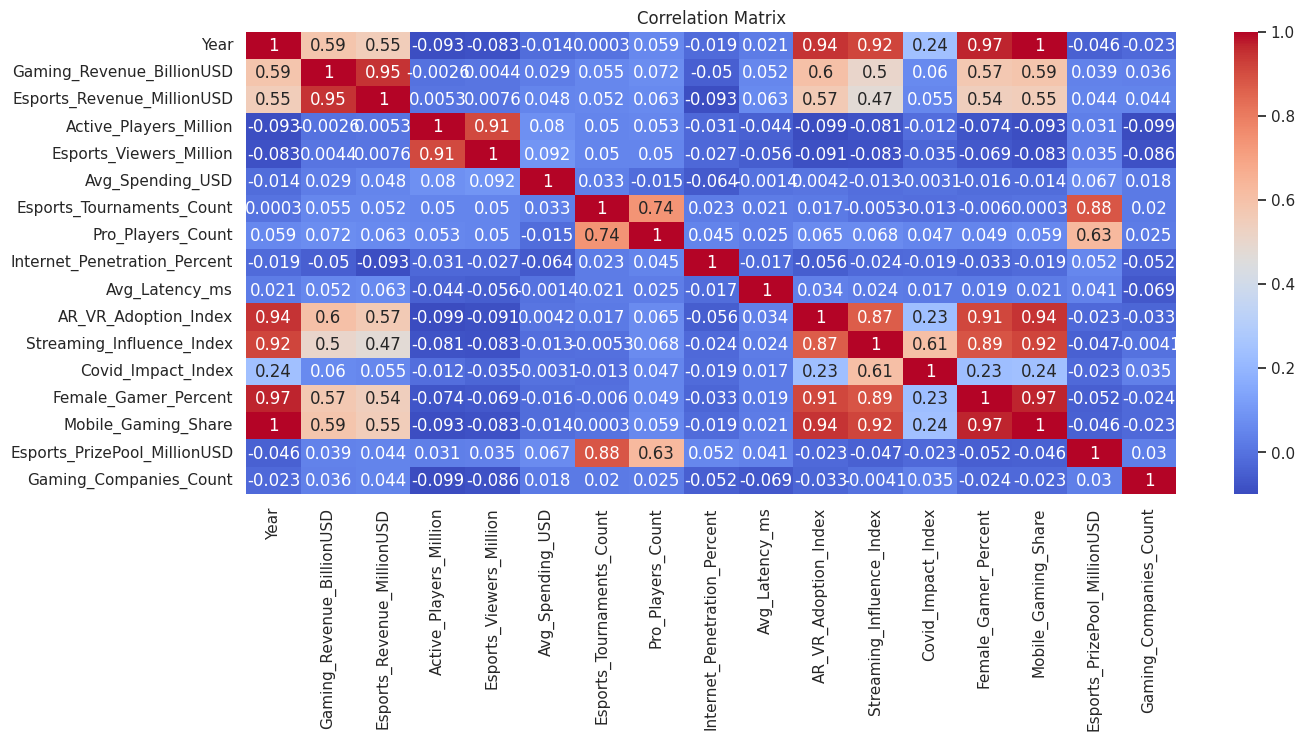

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Normalization

In [ ]:
#min-max
df_norm = df.copy()
for N in ['Avg_Spending_USD','Avg_Latency_ms']:
  min_val = df[N].min()
  max_val = df[N].max()
  df_norm[N] = (df[N] - min_val) / (max_val - min_val)
print('Min-Max Normalization :',df_norm.head())

Min-Max Normalization :    Year        Country         Region  Gaming_Revenue_BillionUSD  \
0  2010  United States  North America                       6.24   
1  2011  United States  North America                       7.74   
2  2012  United States  North America                       9.60   
3  2013  United States  North America                      11.91   
4  2014  United States  North America                      14.77   

   Esports_Revenue_MillionUSD  Active_Players_Million  \
0                       409.6                    11.0   
1                       622.7                    32.4   
2                       928.3                    51.9   
3                      1321.8                    50.3   
4                       869.1                    13.4   

   Esports_Viewers_Million  Avg_Spending_USD Top_Genre Top_Platform  ...  \
0                     17.9          0.865721  Strategy       Mobile  ...   
1                     76.7          0.290242    Sports      Console  ...

Z- score standerization

In [ ]:
df_z = df.copy()
for Z in ['Avg_Spending_USD','Avg_Latency_ms']:
  df_mean = df[Z].mean()
  df_std = df[Z].std()
  df_z[Z] = (df[Z] - df_mean) / df_std
print('Z-score Normalization :',df_z.head())

Z-score Normalization :    Year        Country         Region  Gaming_Revenue_BillionUSD  \
0  2010  United States  North America                       6.24   
1  2011  United States  North America                       7.74   
2  2012  United States  North America                       9.60   
3  2013  United States  North America                      11.91   
4  2014  United States  North America                      14.77   

   Esports_Revenue_MillionUSD  Active_Players_Million  \
0                       409.6                    11.0   
1                       622.7                    32.4   
2                       928.3                    51.9   
3                      1321.8                    50.3   
4                       869.1                    13.4   

   Esports_Viewers_Million  Avg_Spending_USD Top_Genre Top_Platform  ...  \
0                     17.9          1.236281  Strategy       Mobile  ...   
1                     76.7         -0.785151    Sports      Console  ...

Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_label = df.copy()

df_label['Top_Genre'] = label.fit_transform(df_label['Top_Genre'])
df_label['Top_Platform'] = label.fit_transform(df_label['Top_Platform'])
print('\nAfter implementing label encoding :\n',df_label.head())


After implementing label encoding :
    Year        Country         Region  Gaming_Revenue_BillionUSD  \
0  2010  United States  North America                       6.24   
1  2011  United States  North America                       7.74   
2  2012  United States  North America                       9.60   
3  2013  United States  North America                      11.91   
4  2014  United States  North America                      14.77   

   Esports_Revenue_MillionUSD  Active_Players_Million  \
0                       409.6                    11.0   
1                       622.7                    32.4   
2                       928.3                    51.9   
3                      1321.8                    50.3   
4                       869.1                    13.4   

   Esports_Viewers_Million  Avg_Spending_USD  Top_Genre  Top_Platform  ...  \
0                     17.9             133.9          4             1  ...   
1                     76.7              64.9          

one hot encoding

In [ ]:
df_one = pd.get_dummies(df, columns=['Top_Genre','Top_Platform'])
print('\nAfter implementing one hot encoding :\n',df_one.head())

df_cat = [col for col in df_one.columns if col.startswith('Top_Genre_') or col.startswith('Top_Platform_')]
df_one = df_one[['Year'] + df_cat].astype(int)
print(df_one.head())


After implementing one hot encoding :
    Year        Country         Region  Gaming_Revenue_BillionUSD  \
0  2010  United States  North America                       6.24   
1  2011  United States  North America                       7.74   
2  2012  United States  North America                       9.60   
3  2013  United States  North America                      11.91   
4  2014  United States  North America                      14.77   

   Esports_Revenue_MillionUSD  Active_Players_Million  \
0                       409.6                    11.0   
1                       622.7                    32.4   
2                       928.3                    51.9   
3                      1321.8                    50.3   
4                       869.1                    13.4   

   Esports_Viewers_Million  Avg_Spending_USD  Esports_Tournaments_Count  \
0                     17.9             133.9                        104   
1                     76.7              64.9              

imputation

In [ ]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
df[['Gaming_Revenue_BillionUSD','Esports_Revenue_MillionUSD']] = mean_imputer.fit_transform(df[['Gaming_Revenue_BillionUSD','Esports_Revenue_MillionUSD']])
print('\nAfter implementing mean imputation :\n',df.head())

mode_imputer = SimpleImputer(strategy='most_frequent')
df[['Gaming_Revenue_BillionUSD','Esports_Revenue_MillionUSD']] = mode_imputer.fit_transform(df[['Gaming_Revenue_BillionUSD','Esports_Revenue_MillionUSD']])
print('\nAfter implementing mode imputation :\n',df.head())


After implementing mean imputation :
    Year        Country         Region  Gaming_Revenue_BillionUSD  \
0  2010  United States  North America                       6.24   
1  2011  United States  North America                       7.74   
2  2012  United States  North America                       9.60   
3  2013  United States  North America                      11.91   
4  2014  United States  North America                      14.77   

   Esports_Revenue_MillionUSD  Active_Players_Million  \
0                       409.6                    11.0   
1                       622.7                    32.4   
2                       928.3                    51.9   
3                      1321.8                    50.3   
4                       869.1                    13.4   

   Esports_Viewers_Million  Avg_Spending_USD Top_Genre Top_Platform  ...  \
0                     17.9             133.9  Strategy       Mobile  ...   
1                     76.7              64.9    Sports   

Binarization

In [ ]:
from sklearn.preprocessing import Binarizer

binarizer_Avg_Spending_USD = Binarizer(threshold=84.1)
binarizer_Avg_Latency_ms = Binarizer(threshold=88.2)
binarizer_Mobile_Gaming_Share = Binarizer(threshold=26.0)

df['Avg_Spend_Usd'] = binarizer_Avg_Spending_USD.fit_transform(df[['Avg_Spending_USD']])
df['Avg_Laten_ms'] = binarizer_Avg_Latency_ms.fit_transform(df[['Avg_Latency_ms']])
df['Mobile_Game_Share'] = binarizer_Mobile_Gaming_Share.fit_transform(df[['Mobile_Gaming_Share']])

visualization

/tmp/ipython-input-418653772.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Avg_Spend_Usd'],ax=axes[0,1],palette='viridis')
/tmp/ipython-input-418653772.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Avg_Laten_ms'],ax=axes[1,1],palette='viridis')
/tmp/ipython-input-418653772.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Mobile_Game_Share'],ax=axes[2,1],palette='viridis')


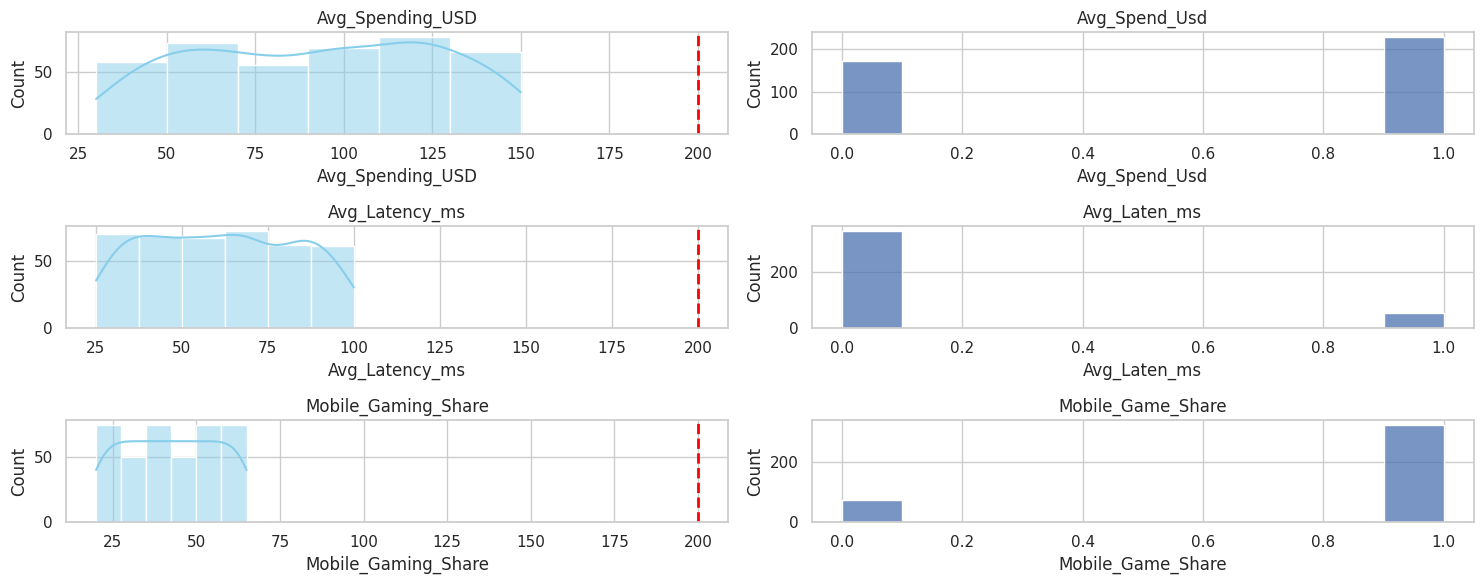

In [ ]:
from sklearn.preprocessing import Binarizer

binarizer_Avg_Spending_USD = Binarizer(threshold=84.1)
binarizer_Avg_Latency_ms = Binarizer(threshold=88.2)
binarizer_Mobile_Gaming_Share = Binarizer(threshold=26.0)

df['Avg_Spend_Usd'] = binarizer_Avg_Spending_USD.fit_transform(df[['Avg_Spending_USD']])
df['Avg_Laten_ms'] = binarizer_Avg_Latency_ms.fit_transform(df[['Avg_Latency_ms']])
df['Mobile_Game_Share'] = binarizer_Mobile_Gaming_Share.fit_transform(df[['Mobile_Gaming_Share']])

fig,axes = plt.subplots(3,2,figsize=(15,6))

#avg_spend
sns.histplot(df['Avg_Spending_USD'],bins=6,kde=True,ax=axes[0,0],color='skyblue')
axes[0,0].axvline(200,color='red',linestyle='--',linewidth=2)
axes[0,0].set_title('Avg_Spending_USD')
sns.histplot(df['Avg_Spend_Usd'],ax=axes[0,1],palette='viridis')
axes[0,1].set_title('Avg_Spend_Usd')

#avg_latency
sns.histplot(df['Avg_Latency_ms'],bins=6,kde=True,ax=axes[1,0],color='skyblue')
axes[1,0].axvline(200,color='red',linestyle='--',linewidth=2)
axes[1,0].set_title('Avg_Latency_ms')
sns.histplot(df['Avg_Laten_ms'],ax=axes[1,1],palette='viridis')
axes[1,1].set_title('Avg_Laten_ms')

#mobile_share
sns.histplot(df['Mobile_Gaming_Share'],bins=6,kde=True,ax=axes[2,0],color='skyblue')
axes[2,0].axvline(200,color='red',linestyle='--',linewidth=2)
axes[2,0].set_title('Mobile_Gaming_Share')
sns.histplot(df['Mobile_Game_Share'],ax=axes[2,1],palette='viridis')
axes[2,1].set_title('Mobile_Game_Share')

plt.tight_layout()
plt.show()

Winsorization

In [ ]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 9.7 MB/s eta 0:00:00


<Axes: ylabel='Avg_Spending_USD'>

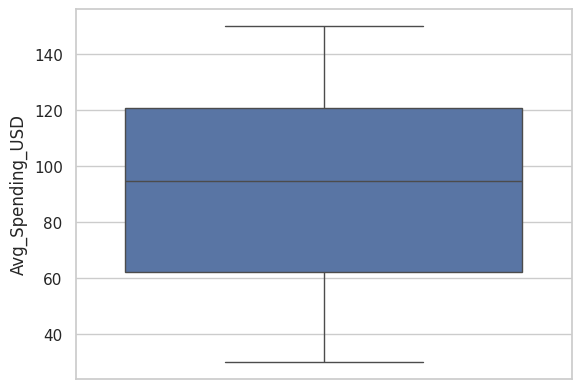

In [ ]:
from feature_engine.outliers import Winsorizer
winsorizer_iqr = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables='Avg_Spending_USD')
df_winso = winsorizer_iqr.fit_transform(df[['Avg_Spending_USD']])
sns.boxplot(df_winso.Avg_Spending_USD)

<Axes: ylabel='Avg_Spending_USD'>

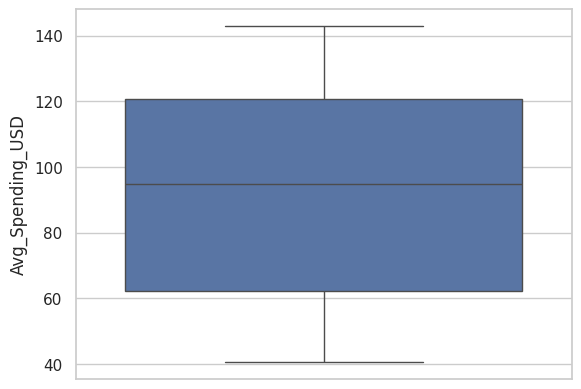

In [ ]:
winsorizer_gaussin = Winsorizer(capping_method='gaussian',tail='both',fold=1.5,variables='Avg_Spending_USD')
df_gauss = winsorizer_gaussin.fit_transform(df[['Avg_Spending_USD']])
sns.boxplot(df_gauss.Avg_Spending_USD)

Discretization

/tmp/ipython-input-1329390438.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Female_Gamer'],ax=axes[0,1],palette='viridis')
/tmp/ipython-input-1329390438.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Esports_Prize_pool'],ax=axes[1,1],palette='magma')


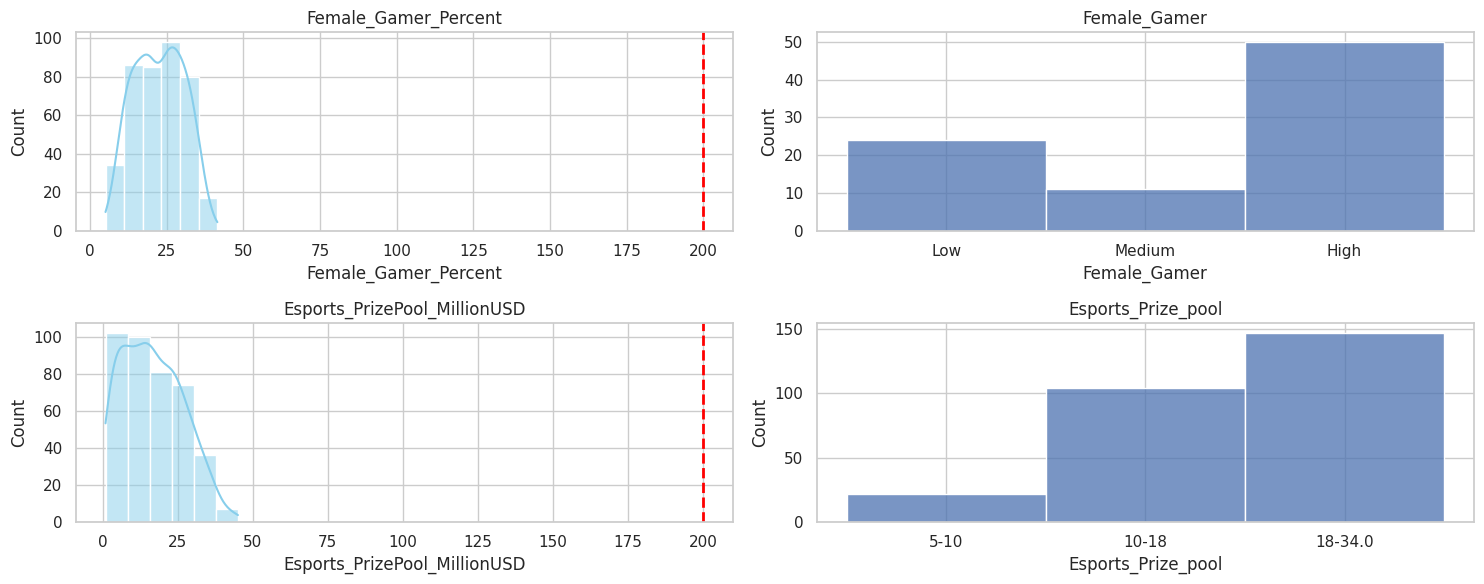

In [ ]:
df['Female_Gamer'] = pd.cut(df['Female_Gamer_Percent'],bins=[10.7,12.8,13.3,17.0],labels=['Low','Medium','High'])
df['Esports_Prize_pool'] = pd.cut(df['Esports_PrizePool_MillionUSD'],bins=[8.5,10.2,18.3,34.0],labels=['5-10','10-18','18-34.0'])

# visualization

fig,axes = plt.subplots(2,2,figsize=(15,6))

#female_gamer
sns.histplot(df['Female_Gamer_Percent'],bins=6,kde=True,ax=axes[0,0],color='skyblue')
axes[0,0].axvline(200,color='red',linestyle='--',linewidth=2)
axes[0,0].set_title('Female_Gamer_Percent')
sns.histplot(df['Female_Gamer'],ax=axes[0,1],palette='viridis')
axes[0,1].set_title('Female_Gamer')

#esports_price
sns.histplot(df['Esports_PrizePool_MillionUSD'],bins=6,kde=True,ax=axes[1,0],color='skyblue')
axes[1,0].axvline(200,color='red',linestyle='--',linewidth=2)
axes[1,0].set_title('Esports_PrizePool_MillionUSD')
sns.histplot(df['Esports_Prize_pool'],ax=axes[1,1],palette='magma')
axes[1,1].set_title('Esports_Prize_pool')

plt.tight_layout()
plt.show()